In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import random
import pipeline

In [3]:
demographic_df = pd.read_sas('../data/raw_1.sas7bdat')
gambling_series_df = pd.read_sas('../data/raw_2.sas7bdat')
rg_intervention_df = pd.read_sas('../data/raw_3.sas7bdat')

## Demographic Exploration

In [4]:
demo_df = pd.read_sas('../data/raw_1.sas7bdat')
demo_df.head()
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   USERID              4134 non-null   float64       
 1   RG_case             4134 non-null   float64       
 2   CountryName         4134 non-null   object        
 3   LanguageName        4134 non-null   object        
 4   Gender              4134 non-null   object        
 5   YearofBirth         3967 non-null   float64       
 6   Registration_date   3967 non-null   datetime64[ns]
 7   First_Deposit_Date  4134 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 258.5+ KB


In [5]:
#demographic_df.info()
DEMO_RENAME = {"USERID": "user_id", "RG_case" : "rg", "CountryName" : "country",
              "LanguageName" : "language", "Gender" : "gender", "YearofBirth" : "birth_year",
              "Registration_date" : "registration_date", "First_Deposit_Date" : "first_deposit_date"}
def clean_str_series(obj_ser):
    rep = lambda m: m.group(1)
    clean_ser = obj_ser.astype(str)
    clean_ser = (clean_ser.str.replace(pat = r"b\'(.*?)\'", repl = rep) #remove the b'*' structure
                            .str.lower()
                            .str.replace(pat = r"(.*?)\..*", repl = rep) #remove TLD if there
                            .replace(" ", "_", regex = True))
    clean_ser = clean_ser.replace("", "unknown")
    return clean_ser

def clean_demographic(df_demo):
    clean_df = df_demo.copy()
    clean_df = clean_df.rename(DEMO_RENAME, axis = 1)
    clean_df = clean_df.fillna({'registration_date' : pd.to_datetime('1900-01-01'), 'birth_year' : 1900})
    clean_df[['user_id', 'rg', 'birth_year']] = clean_df[['user_id', 'rg', 'birth_year']].astype(int)
    obj_rows = ['country','language','gender']
    for obj in obj_rows:
        clean_df[obj] = clean_str_series(clean_df[obj])
    clean_df.set_index('user_id', inplace = True)
    return clean_df
demo_df = pipeline.clean_demographic(demographic_df)
demo_df[3]

KeyError: 3

In [ ]:
gb_con = demo_df.groupby(['country'])
gb_con.count().sort_values('language', ascending = False).head(20)

In [ ]:
demo_df['birth_year'].hist(bins = 50)

In [7]:
rg_ids = list(demo_df[demo_df['rg'] == 1].index)
no_rg_ids = list(demo_df[demo_df['rg'] == 0].index)

# DF2_EXPLORATION

In [8]:
gambling_series_df = pd.read_sas('../data/raw_2.sas7bdat')

In [9]:
gambling_series_df.head()
x = gambling_series_df.groupby('ProductType')['NumberofBets'].mean()
z = gambling_series_df.copy()
x
#z['scaledBets'] = z['NumberofBets']/x
#z

ProductType
1.0       6.224258
2.0      13.437422
3.0      11.831543
4.0     240.155333
5.0       2.502683
6.0     106.682918
7.0      70.777140
8.0     335.639540
9.0       3.684211
10.0    110.662380
14.0     52.996170
15.0    125.791858
16.0      8.000000
17.0    122.614625
19.0     16.661385
20.0     19.894081
21.0      1.157895
22.0      2.797468
23.0      7.941564
24.0      1.485714
25.0    111.714286
Name: NumberofBets, dtype: float64

In [7]:
GAMBLING_RENAME = {"UserID": "user_id", "Date" : "date", "ProductType" : "product_type",
              "Turnover" : "turnover", "Hold" : "hold", "NumberofBets" : "num_bets"}

In [8]:
def clean_gambling(gam_df):
    gam_clean = gam_df.copy()
    gam_clean = gam_clean.rename(GAMBLING_RENAME, axis = 1)
    gam_clean ['num_bets'] = gam_clean['num_bets'].fillna(0)
    int_rows = ['user_id','product_type','num_bets']
    gam_clean[int_rows] = gam_clean[int_rows].astype(int)
    return gam_clean

In [25]:
gam_clean = clean_gambling(gambling_series_df)
gam_clean
gam_clean.groupby('product_type').count()
x = 5000
gam_clean[x:x+50]

,user_id,date,product_type,turnover,hold,num_bets
5000,332091,2008-07-21,1,0.00,0.00,0
5001,332091,2008-07-22,1,150.00,150.00,1
5002,332091,2008-07-23,1,0.00,0.00,0
5003,332091,2008-07-28,1,195.43,195.43,2
5004,332091,2008-07-29,1,100.00,100.00,1
5005,332091,2008-07-30,1,0.00,0.00,0
5006,332091,2008-07-31,1,200.00,200.00,2
5007,332091,2008-08-02,1,0.00,0.00,0
5008,332091,2008-08-05,1,50.02,50.02,1
5009,332091,2008-08-06,1,50.00,50.00,1


In [13]:
def make_ts(gam_data, user_id, product_type):
    mask = (gam_data['user_id'] == user_id) & (gam_data['product_type'] == product_type)
    series = gam_data[mask].copy()
    reg_date = demo_df.loc[user_id].registration_date
    #last_gamble = series['date'].max()
    idx = pd.date_range(reg_date, '2010-11-30')
    series = series.set_index('date')
    series = series.reindex(idx, fill_value=0)
    series = series.replace({"user_id" : {0 : user_id}, "product_type": {0 : product_type}})
    series['hold_cum'] = series['hold'].cumsum() #Move this out later
    return series

Text(0.5, 1.0, 'Zoomed in User #31965')

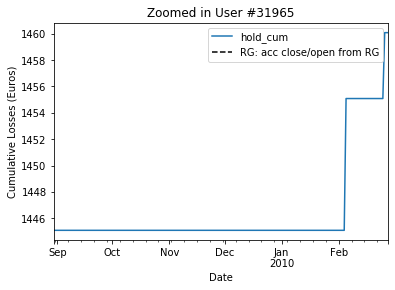

In [29]:
user_id = 31965
ts = make_ts(gam_clean, user_id, 1)
year_window = ts['2009-8-30':'2010-02-28'] 
year_window['hold_cum'].plot()
plt.xlabel("Date")
plt.ylabel("Cumulative Losses (Euros)")
first_rg = rg_info.loc[user_id, 'first_date']
rg_desc = rg_info.loc[user_id, 'ev_desc']
plt.axvline(first_rg, linestyle = "--", label = f'RG: {rg_desc}', color = 'black')
plt.legend()
plt.title(f"Zoomed in User #{user_id}")

In [30]:
has_hold_data = [1,2,4,8,17]

In [31]:
def accum_by_date(gam_data, user_id, product_types = has_hold_data):
    '''Accumulates the turnover+hold across all product_types'''
    mask = (gam_data['user_id'] == user_id) & (gam_data['product_type'].isin(product_types))
    series = gam_data[mask].groupby('date').sum()
    series = series.drop(["product_type","user_id"], axis = 1)
    reg_date = demo_df.loc[user_id].registration_date
    #last_gamble = series['date'].max()
    idx = pd.date_range(reg_date, '2010-11-30')
    series = series.reindex(idx, fill_value=0)
    series['hold_cum'] = series['hold'].cumsum() #Move this out later
    return series.copy()

In [32]:
user_id = 2169867
product_types = [10]
ts = accum_by_date(gam_clean,user_id, product_types)
ts
# for product in product_types:
#     ts_i = make_ts(gam_clean,user_id,product)
#     ts[f'hold{product}'] = ts_i['hold']
# ts_acc = accum_by_date(gam_clean,user_id, [1,2,4,8,17])
# print(ts)
gam_clean[(gam_clean['product_type'] == 10) & ]

SyntaxError: invalid syntax (<ipython-input-32-afdd0b3ad32f>, line 10)

1


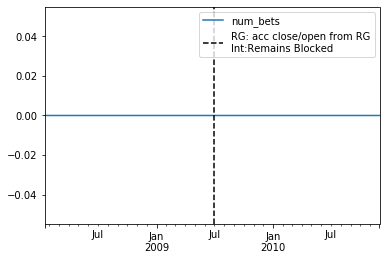

1


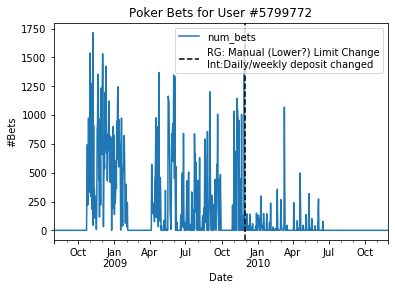

1


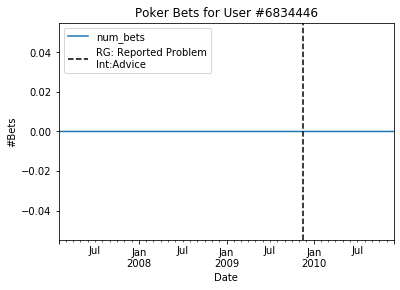

1


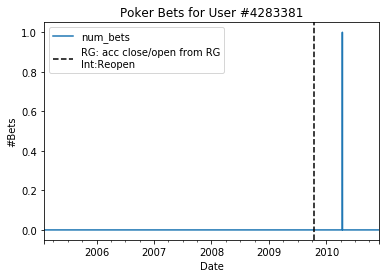

1


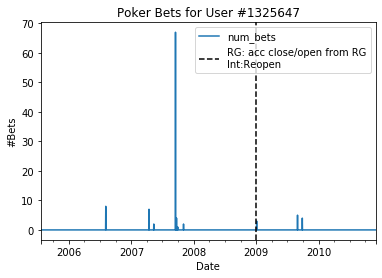

1


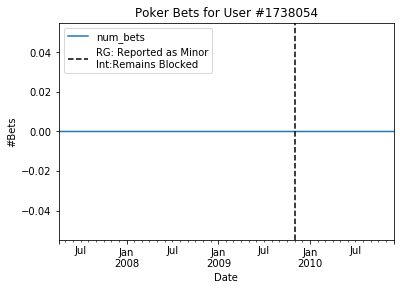

1


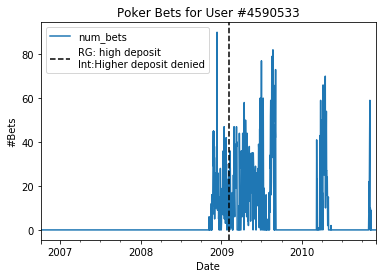

1


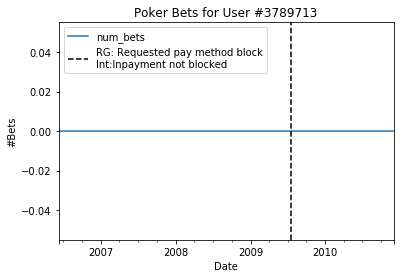

1


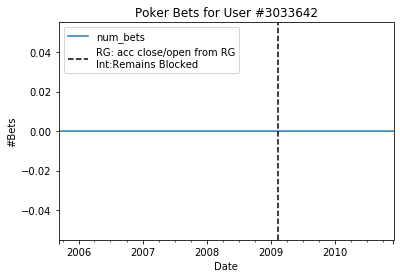

1


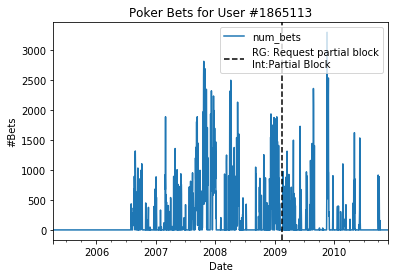

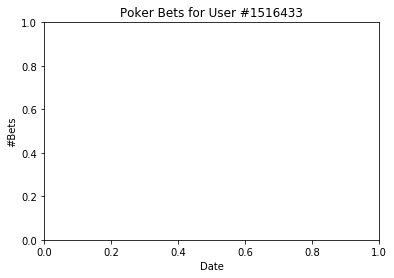

In [41]:
def plot_ts(ts, user_id, plt_column = 'hold_cum', rg_info = None):
    ts[plt_column].plot(label = plt_column)
    #ts['num_bets'].plot(label = "Cumulative Loss")
    if rg_info is not None and (user_id in rg_info.index):
        first_rg = rg_info.loc[user_id, 'first_date']
        rg_desc = rg_info.loc[user_id, 'ev_desc']
        inter_desc = rg_info.loc[user_id, 'inter_desc']
        print(rg_info.loc[user_id, 'events'])
        plt.axvline(first_rg, linestyle = "--", label = f'RG: {rg_desc}\nInt:{inter_desc}', color = 'black')
    plt.legend()
    plt.show() 
    
for _ in range(10):
    user_id = random.choice(rg_ids)
    #user_id = 2169867
    product_types = [10]
    ts = accum_by_date(gam_clean, user_id, product_types)
    plot_ts(ts, user_id, plt_column = 'num_bets', rg_info = rg_info)
    plt.title(f'Poker Bets for User #{user_id}')
    plt.xlabel("Date")
    plt.ylabel("#Bets")

In [42]:
gam_clean.max()

user_id                     9859152
date            2010-11-10 00:00:00
product_type                     25
turnover                1.31134e+06
hold                          34695
num_bets                      20587
dtype: object

# DF3_EXPLORATION

In [15]:
rg_intervention_df = pd.read_sas('../data/raw_3.sas7bdat')

In [16]:
rg_intervention_df.head()
rg_intervention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UserID                  2068 non-null   float64       
 1   RGsumevents             2068 non-null   float64       
 2   RGFirst_Date            2065 non-null   datetime64[ns]
 3   RGLast_date             2067 non-null   datetime64[ns]
 4   Event_type_first        2068 non-null   float64       
 5   Interventiontype_first  2062 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 97.1 KB


In [17]:
RG_RENAME = {"UserID": "user_id", "RGsumevents" : "events", "RGFirst_Date" : "first_date", 
             "Event_type_first" : "event_type_first", 
             "RGLast_date" : "last_date", "Interventiontype_first" : "inter_type_first"}

In [18]:
event_code_dict = {1: "Family Intervention", 2 : "acc close/open from RG", 3 : "Cancelled outpayment", 
                   4: "Manual (Lower?) Limit Change", 6: "Heavy Complainer", 7: "Requested pay method block",
                   8: "Reported as Minor", 9: "Request partial block", 10: "Reported Problem", 
                   11: "high deposit", 12 : "Two RG events on the day", 13: "Event unknown"}

intervention_code_dict = {-1: "Intevention Unknown", 1: "Advice", 2: "Reopen", 
                          3: "Consumer request not technically possible", 4: "Block (pending invest)",
                          5: "VIP Deposit Change", 6: "Partial Block (incomplete)", 7: "Advice To 3rd Party",
                          8: "Partial Block", 9: "Inpayment not blocked", 10 : "Inpayment blocked",
                          11: "Higher deposit denied", 12 : "Higher Deposit Accepted", 13 : "Daily/weekly deposit changed", 
                          14: "Full Block", 15 : "Betting Limit Change", 16: "Remains Blocked", 
                          17 : "Blocked and Reimbursed", 18: "Requested Partial Block Not Possible"}

In [19]:
def clean_rg_info(rg_info):
    rg_info = rg_info.rename(RG_RENAME, axis = 1)
    int_cols = ['event_type_first', 'events', 'user_id']
    rg_info[int_cols] = rg_info[int_cols].astype(int)
    rg_info.set_index('user_id', inplace = True)
    rg_info['inter_type_first'] = rg_info['inter_type_first'].fillna(-1).astype(int)
    rg_info['ev_desc'] = rg_info['event_type_first'].replace(event_code_dict)
    rg_info['inter_desc'] = rg_info['inter_type_first'].replace(intervention_code_dict)
    return rg_info
rg_info = clean_rg_info(rg_intervention_df)
rg_info

,events,first_date,last_date,event_type_first,inter_type_first,ev_desc,inter_desc
user_id,,,,,,,
2169867,1,2009-11-19,2009-11-19,9,18,Request partial block,Requested Partial Block Not Possible
7035862,1,2009-11-15,2009-11-15,9,18,Request partial block,Requested Partial Block Not Possible
5911218,1,2009-11-08,2009-11-08,9,18,Request partial block,Requested Partial Block Not Possible
5872708,1,2009-11-03,2009-11-03,9,18,Request partial block,Requested Partial Block Not Possible
5746942,2,2009-10-18,2009-11-03,9,18,Request partial block,Requested Partial Block Not Possible
...,...,...,...,...,...,...,...
2451840,5,NaT,2009-11-03,12,-1,Two RG events on the day,Intevention Unknown
9140426,1,2009-08-19,2009-08-19,10,-1,Reported Problem,Intevention Unknown
2590026,2,2009-08-05,2009-08-06,10,-1,Reported Problem,Intevention Unknown


In [20]:
def subset_rg(rg_info, events = None, interventions = None):
    filtered_rg = rg_info.copy()
    if events:
        event_mask = filtered_rg['event_type_first'].isin(events)
        filtered_rg  = filtered_rg[event_mask]
    if interventions:
        intervent_mask = filtered_rg['inter_type_first'].isin(interventions)
        filtered_rg  = filtered_rg[intervent_mask]
    return filtered_rg 
event_filter = [1,2,4,6,7,9,10,12,13]
intervent_filter = [2,3,4,6,8,10,13,14,15,16,17,18]
major_filter = subset_rg(rg_info, events = event_filter, interventions = intervent_filter)
major_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 2169867 to 5070173
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   events            1720 non-null   int64         
 1   first_date        1718 non-null   datetime64[ns]
 2   last_date         1719 non-null   datetime64[ns]
 3   event_type_first  1720 non-null   int64         
 4   inter_type_first  1720 non-null   int64         
 5   ev_desc           1720 non-null   object        
 6   inter_desc        1720 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 107.5+ KB


In [21]:
rg_info[rg_info['inter_type_first'] == 2].groupby('ev_desc').count()

,events,first_date,last_date,event_type_first,inter_type_first,inter_desc
ev_desc,,,,,,
Manual (Lower?) Limit Change,1,1,1,1,1,1
Reported as Minor,1,1,1,1,1,1
Request partial block,4,4,4,4,4,4
acc close/open from RG,572,572,572,572,572,572


In [22]:
gb_comb = rg_info.groupby(['ev_desc', 'inter_desc'])
gb_comb.count()

events  \
ev_desc                      inter_desc                                          
Cancelled outpayment         Advice                                          2   
                             Consumer request not technically possible      16   
                             Full Block                                      1   
Event unknown                Intevention Unknown                             1   
Family Intervention          Advice                                         18   
                             Full Block                                      2   
                             Inpayment not blocked                           1   
                             Intevention Unknown                             1   
                             Remains Blocked                                 1   
Heavy Complainer             Advice                                         31   
                             Block (pending invest)                          5   
                             Full Block                                      4   
                             Intevention Unknown                             1   
Manual (Lower?) Limit Change Advice                                          1   
                             Betting Limit Change                            2   
                             Daily/weekly deposit changed                  304   
                             Reopen                                          1   
Reported Problem             Advice                                        132   
                             Block (pending invest)                          1   
                             Blocked and Reimbursed                          1   
                             Full Block                                    193   
                             Inpayment not blocked                           1   
                             Intevention Unknown                             2   
                             Partial Block (incomplete)                      2   
                             Remains Blocked                                 2   
Reported as Minor            Advice                                          1   
                             Blocked and Reimbursed                          1   
                             Full Block                                     12   
                             Remains Blocked                                 5   
                             Reopen                                          1   
Request partial block        Inpayment not blocked                           1   
                             Partial Block                                 137   
                             Partial Block (incomplete)                    106   
                             Reopen                                          4   
                             Requested Partial Block Not Possible           26   
Requested pay method block   Advice                                          1   
                             Inpayment not blocked                           9   
Two RG events on the day     Intevention Unknown                             1   
acc close/open from RG       Advice                                          3   
                             Daily/weekly deposit changed                    4   
                             Full Block                                     75   
                             Partial Block                                   2   
                             Partial Block (incomplete)                      1   
                             Remains Blocked                               274   
                             Reopen                                        572   
                             Requested Partial Block Not Possible            1   
high deposit                 Advice                                          6   
                             Daily/weekly deposit chan

In [23]:
df_firsts = rg_info[rg_info['events'] == 1]
gb_comb = df_firsts.groupby(['ev_desc', 'inter_desc'])
gb_comb.count()

events  \
ev_desc                      inter_desc                                          
Cancelled outpayment         Advice                                          2   
                             Consumer request not technically possible      14   
                             Full Block                                      1   
Event unknown                Intevention Unknown                             1   
Family Intervention          Advice                                         13   
                             Full Block                                      2   
                             Inpayment not blocked                           1   
                             Intevention Unknown                             1   
                             Remains Blocked                                 1   
Heavy Complainer             Advice                                         29   
                             Block (pending invest)                          4   
                             Full Block                                      4   
                             Intevention Unknown                             1   
Manual (Lower?) Limit Change Advice                                          1   
                             Betting Limit Change                            1   
                             Daily/weekly deposit changed                  219   
                             Reopen                                          1   
Reported Problem             Advice                                        110   
                             Block (pending invest)                          1   
                             Full Block                                    158   
                             Intevention Unknown                             1   
                             Partial Block (incomplete)                      2   
                             Remains Blocked                                 2   
Reported as Minor            Advice                                          1   
                             Full Block                                     12   
                             Remains Blocked                                 5   
                             Reopen                                          1   
Request partial block        Partial Block                                 117   
                             Partial Block (incomplete)                     95   
                             Reopen                                          4   
                             Requested Partial Block Not Possible           23   
Requested pay method block   Advice                                          1   
                             Inpayment not blocked                           9   
acc close/open from RG       Advice                                          2   
                             Daily/weekly deposit changed                    4   
                             Full Block                                     66   
                             Partial Block                                   2   
                             Remains Blocked                               263   
                             Reopen                                        482   
                             Requested Partial Block Not Possible            1   
high deposit                 Advice                                          5   
                             Daily/weekly deposit changed                    2   
                             Higher Deposit Accepted                         1   
                             Higher deposit denied                          83   
                             VIP Deposit Change                              3   

                                                                        first_date  \
ev_desc                      inter_desc                                              
Cancelled outpayment         Advice          

In [24]:
rg_info.min(), rg_info.max()

(events                                 1
 first_date           2008-11-02 00:00:00
 last_date            2008-11-02 00:00:00
 event_type_first                       1
 inter_type_first                      -1
 ev_desc             Cancelled outpayment
 inter_desc                        Advice
 dtype: object,
 events                                8
 first_date          2009-11-30 00:00:00
 last_date           2009-11-30 00:00:00
 event_type_first                     13
 inter_type_first                     18
 ev_desc                    high deposit
 inter_desc           VIP Deposit Change
 dtype: object)

In [25]:
rg_info['event_type_first'].value_counts()

2     932
10    334
4     308
9     274
11    105
6      41
1      23
8      20
3      19
7      10
13      1
12      1
Name: event_type_first, dtype: int64

In [26]:
rg_info.loc[31965]#df_major_int['user_id'] == 31965]

events                                   1
first_date             2009-03-04 00:00:00
last_date              2009-03-04 00:00:00
event_type_first                         2
inter_type_first                         8
ev_desc             acc close/open from RG
inter_desc                   Partial Block
Name: 31965, dtype: object

In [27]:
rg_intervention_df.head()

,UserID,RGsumevents,RGFirst_Date,RGLast_date,Event_type_first,Interventiontype_first
0,2169867.0,1.0,2009-11-19,2009-11-19,9.0,18.0
1,7035862.0,1.0,2009-11-15,2009-11-15,9.0,18.0
2,5911218.0,1.0,2009-11-08,2009-11-08,9.0,18.0
3,5872708.0,1.0,2009-11-03,2009-11-03,9.0,18.0
4,5746942.0,2.0,2009-10-18,2009-11-03,9.0,18.0


NameError: name 'gam_clean' is not defined